In [ ]:
# Codes are adapted from http://bit.ly/2U7ttYT (파이토치 첫걸음,한빛미디어)

# 왜 컨볼루셔널 인공신경망이 필요할까? (Why Convolutional Neural Network?)
- MNIST data
- 인공신경망 만으로 어느정도 성능이 나오는지 확인해보자
- 5.6 기본적인 합성곱 신경망 실습을 먼저보고 이 파일을 보시면 됩니다.

## 1. Setting
### 1) Import Required Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/ColabNotebooks/Lecture/Pytorch/Codes'

/content/drive/MyDrive/ColabNotebooks/Lecture/Pytorch/Codes


In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

### 2) Set hyperparameters

In [4]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

## 3. Data Generation

### 1) Download Data

In [6]:
mnist_train = dset.MNIST("./data", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./data", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

### 2) Check Dataset

In [7]:
print(mnist_train.__getitem__(0)[1], mnist_train.__len__())
mnist_test.__getitem__(0)[1], mnist_test.__len__()

5 60000


(7, 10000)

### 3) Set DataLoader

In [8]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

## 4. Model & Optimizer

### 1) CNN Model

In [9]:
class Linear(nn.Module):
    def __init__(self):
        super(Linear,self).__init__()
        self.layer = nn.Sequential(
            nn.Linear(784,300),
            nn.ReLU(),
            nn.Linear(300,100),
            nn.ReLU(),
            nn.Linear(100,10),
            nn.ReLU()
        )       
        
    def forward(self,x):
        out = x.view(batch_size,-1)
        out = self.layer(out)

        return out

### 2) Loss func & Optimizer

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

model = Linear().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

cuda:0


## 5. Train 

In [11]:
loss_arr =[]
for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):
        x = image.to(device)
        y_= label.to(device)
        
        optimizer.zero_grad()
        output = model.forward(x)
        loss = loss_func(output,y_)
        loss.backward()
        optimizer.step()
        
        if j % 1000 == 0:
            print(loss)
            loss_arr.append(loss.cpu().detach().numpy())

tensor(2.3039, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(1.0360, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.9748, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.9081, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.8836, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7781, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.8834, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.8617, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.8335, device='cuda:0', grad_fn=<NllLossBackward>)
tensor(0.7648, device='cuda:0', grad_fn=<NllLossBackward>)


In [ ]:
#param_list = list(model.parameters())
#print(param_list)

## 5. Visualize Training Loss

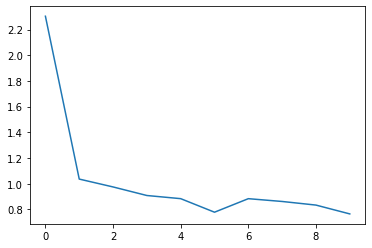

In [12]:

plt.plot(loss_arr)
plt.show()

## 6. Test

In [13]:
correct = 0
total = 0

with torch.no_grad():
  for image,label in test_loader:
      x = image.to(device)
      y_= label.to(device)

      output = model.forward(x)
      _,output_index = torch.max(output,1)

      total += label.size(0)
      correct += (output_index == y_).sum().float()

  print("Accuracy of Test Data: {}".format(100*correct/total))

Accuracy of Test Data: 66.4363021850586
